In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("../input/digit-recognizer/train.csv")
print(train.shape)

(42000, 785)


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test = pd.read_csv("../input/digit-recognizer/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y_train = train["label"]
X_train = train.drop(labels= ["label"],axis=1)

In [7]:
x_train = X_train.values.reshape(-1, 28, 28, 1)

In [8]:
X_train = X_train / 255.0 
test = test / 255.0

In [9]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [10]:
from keras.utils.np_utils import to_categorical 
Y_train = to_categorical(Y_train, num_classes = 10)
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [11]:
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=2)
print("x_train shape: ", X_train.shape)
print("x_val shape: ", X_val.shape)
print("y_train shape: ", Y_train.shape)
print("x_val shape: ", Y_val.shape)

x_train shape:  (37800, 28, 28, 1)
x_val shape:  (4200, 28, 28, 1)
y_train shape:  (37800, 10)
x_val shape:  (4200, 10)


In [12]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator 
from keras.callbacks import ReduceLROnPlateau

In [13]:
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = "Same",
                activation = "relu", input_shape = (28,28,1))) 
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout (0.25)) 
#
model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = "Same",
                activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides= (2,2))) 
model.add(Dropout(0.25))
#
#
model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = "Same",
                activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides= (2,2))) 
model.add(Dropout(0.25))
#
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [14]:
optimizer = Adam(lr=0.001, beta_1= 0.9, beta_2 = 0.999)

In [15]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [16]:
epoch = 100 
batch_size = 250

In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(X_train)

In [18]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                             epochs = epoch, validation_data=(X_val, Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

2021-11-13 10:53:32.685734: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
151/151 [==============================] - 14s 89ms/step - loss: 2.2102 - accuracy: 0.1840 - val_loss: 1.7368 - val_accuracy: 0.4276
Epoch 2/100
151/151 [==============================] - 13s 85ms/step - loss: 1.9474 - accuracy: 0.3034 - val_loss: 1.2045 - val_accuracy: 0.6521
Epoch 3/100
151/151 [==============================] - 13s 87ms/step - loss: 1.7777 - accuracy: 0.3788 - val_loss: 0.9272 - val_accuracy: 0.7845
Epoch 4/100
151/151 [==============================] - 13s 88ms/step - loss: 1.6819 - accuracy: 0.4110 - val_loss: 0.8243 - val_accuracy: 0.7755
Epoch 5/100
151/151 [==============================] - 13s 85ms/step - loss: 1.6277 - accuracy: 0.4322 - val_loss: 0.7012 - val_accuracy: 0.8488
Epoch 6/100
151/151 [==============================] - 13s 88ms/step - loss: 1.5631 - accuracy: 0.4590 - val_loss: 0.5997 - val_accuracy: 0.8638
Epoch 7/100
151/151 [==============================] - 13s 86ms/step - loss: 1.5244 - accuracy: 0.4741 - val_loss: 0.5370 - val_ac

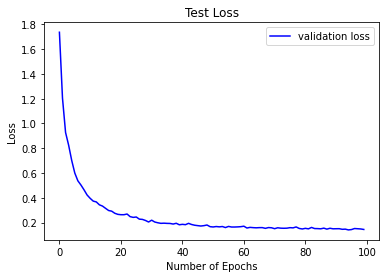

In [19]:
plt.plot(history.history["val_loss"],color = "b", label = "validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [20]:
prediction = model.predict(test)
prediction=np.argmax(prediction,axis=1)
prediction.shape

(28000,)

In [21]:
submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
submission['Label']=prediction
submission.head()
submission.to_csv("submission.csv",index=False)